# \[Week3] 텍스트분석 기초

## 1. 텍스트 분석 기본 용어 정리
https://wikidocs.net/21694  
위의 링크와 구글링으로 정리  
용어 정리는 추후에 본인이 보기에 편한 형식으로 정리하면 됩니다.

**# 1 토큰화 (Tokenization)**

자연어 처리에서 크롤링 등으로 얻어낸 코퍼스 데이터가 필요에 맞게 전처리되지 않은 상태라면, 해당 데이터를 사용하고자하는 용도에 맞게 토큰화(tokenization) & 정제(cleaning) & 정규화(normalization)하는 일을 하게 된다.

주어진 코퍼스(corpus)에서 토큰(token)이라 불리는 단위로 나누는 작업을 토큰화(tokenization)라고 부른다. 토큰화의 단위가 상황에 따라 다르지만, 보통 의미있는 단위로 토큰을 정의한다. (e.g. 단어, 문장)
<br>

_Corpus: 말뭉치 또는 코퍼스는 자연언어 연구를 위해 특정한 목적을 가지고 언어의 표본을 추출한 집합이다._


1) 단어 토큰화 (Word Tokenization) <br>

단어(word)는 단어 단위 외에도 단어구, 의미를 갖는 문자열로도 간주되기도 한다.

토큰화에서 고려해야할 사항

- 구두점이나 특수 문자를 단순 제외해서는 안 된다.

    온점(.)은 문장의 경계를 알 수 있는데 도움이 되므로 단어를 뽑아낼 때, 온점(.)을 제외하지 않을 수 있다. 또한 보통 수치를 표현할 때는 123,456,789와 같이 세 자리 단위로 컴마가 들어간다.
    
    
- 줄임말과 단어 내에 띄어쓰기가 있는 경우

    영어권 언어의 아포스트로피(')는 압촉된 단어를 다시 펼치는 역할을 하기도 한다. (e.g. we're = we are) 
    New York이라는 단어는 하나의 단어지만 중간에 띄어쓰기가 존재한다. 사용 용도에 따라서, 하나의 단어 사이에 띄어쓰기가 있는 경우에도 하나의 토큰으로 봐야한 경우도 있다.


_NLTK의 word_tokenize, WordPunctTokenizer. 캐라스의 text_to_word_sequence_


2) 문장 토큰화 (Sentence Tokenziation) <br>

이 작업은 갖고있는 코퍼스 내에서 문장 단위로 구분하는 작업으로 때로는 문장 분류(sentence segmentation)라고도 부른다.

!나 ?는 문장의 구분을 위한 꽤 명확한 구분자(boundary) 역할을 하지만 온점은 꼭 그렇지는 않다. 온점은 문장의 끝이 아니더라도 등장할 수 있다. 
(e.g. IP 192.168.56.31 또는 Ph.d)

따라서 사용하는 코퍼스가 어떤 국적의 언어인지, 또는 해당 코퍼스 내에서 특수문자들이 어떻게 사용되고 있는지에 따라 직접 규칙을 정의해볼 수 있다.


이진 분류기 (Binary Classifier)
- 문장 토큰화에서의 예외 사항을 발생시키는 온점의 처리를 위해서 입력에 따라 두 개의 클래스로 분류하는 이진 분류기 (binary classifier)를 사용하기도 한다.

두 개의 클래스:
1. 온점(.)이 단어의 일부분일 경우. 즉, 온점이 약어(abbreivation)로 쓰이는 경우

2. 온점(.)이 정말로 문장의 구분자(boundary)일 경우


_오픈소스: NLTK, OpenNLP, 스탠포드 CoreNLP, splitta, LingPipe_
<br><br>

<한국어에서 토큰화의 어려움> <br>

영어는 줄임말에 대한 예외처리만 한다면, 띄어쓰기(whitespace)를 기준으로 하는 띄어쓰기 토큰화를 수행해도 단어 토큰화가 잘 작동한다.

하지만 한국어는 영어와는 달리 띄어쓰기만으로는 토큰화를 하기에 부족하다. 

1) 한국어는 교착어이다.

영어와는 달리 한국어에는 조사라는 것이 존재한다. (e.g. 그(he/him) == 그가, 그에게, 그를, 그와, 그는...) 다양한 조사가 '그'라는 글자 뒤에 띄어쓰기 없이 바로 붙게된다. 

한국어 토큰화에서는 형태소(morpheme)란 개념을 반드시 이해해야한다.

- 자립 형태소: 접사, 어미, 조사와 상관없이 자립하여 사용할 수 있는 형태소. 그 자체로 단어가 된다. 체언(명사, 대명사, 수사), 수식언(관형사, 부사), 감탄사 등이 있다

- 의존 형태소: 다른 형태소와 결합하여 사용되는 형태소, 접사, 어미, 조사, 어간


2) 한국어는 띄어쓰기가 영어보다 잘 지켜지지 않는다.


**# 2 불용어 (Stopword)**


갖고 있는 데이터에서 유의미한 단어 토큰만을 선별하기 위해서는 큰 의미가 없는 단어 토큰을 제거하는 작업이 필요하다. 여기서 큰 의미가 없다라는 것은 자주 등장하지만 분석을 하는 것에 있어서는 큰 도움이 되지 않는 단어들을 말한다. (e.g. I, my, me, over, 조사, 접미사) 

이러한 단어들을 불용어(stopword)라고 하며, NLTK에서는 위와 같은 100여개 이상의 영어 단어들을 불용어로 패키지 내에서 미리 정의하고 있다. 


**# 3 정규표현식 (Regular Expression) 문법** 

텍스트 데이터를 전처리하다보면, 정규 표현식은 아주 유용한 도구로 사용된다. 

<파이썬에서 지원하고 있는 정규 표현식 모듈 re의 사용법>

1) 정규 표현식에 해당하는 스트링 2개 이상  
(1) a+  
aa, abc
<br>
(2) a{3}b{2,}  
aaabb, aaabbbb
<br>
(3) .+b$  
xxxb, ob
<br>
(4) ^ab*  
a, abbbbbbb
<br>
(5) \[a-z]+\[^a|z]  
zzzzj

2) 정규 표현식 문자 규칙 의미  
(1) \\\ \역슬래쉬 문자 자체
<br>
(2) \d \모든 숫자. [0-9]와 의미 동일
<br>
(3) \D \숫자를 제외한 모든 문자 의미. [^0-9]와 의미 동일
<br>
(4) \s \공백 의미. [ \t\n\r\f\v]와 의미 동일
<br>
(5) \S \공백 제외한 문자 의미. [^ \t\n\r\f\v]와 의미 동일
<br>
(6) \w \문자 또는 숫자 의미. [a-zA-Z0-9]와 의미 동일
<br>
(7) \W \문자 또는 숫자가 아닌 문자를 의미. [^a-zA-Z0-9]와 의미 동일

3) 정규표현식 모듈 함수 사용

(1) 출력 결과 : \['010', '1234', '1234', '25']

In [14]:
import re
text = """이름 : 눈송이
전화번호 : 010-1234-5678
나이 : 25
성별 : 여""" 
re.findall('\d+', text)

['010', '1234', '5678', '25']

(2) 출력 결과 : \['1234', '5678']

In [15]:
import re
text = """이름 : 눈송이
전화번호 : 010-1234-5678
나이 : 25
성별 : 여"""  
re.findall('\d{4}', text)

['1234', '5678']

(3) 출력 결과 : \['John', 'James', 'Noonsong'] 

In [16]:
import re
text = """100 John    PROF
101 James   STUD
102 Noonsong   STUD""" 
re.findall('[A-Z][a-z]+', text)

['John', 'James', 'Noonsong']

4. 정수 인코딩(Integer Encoding)  

1) 문장 분리 및 토큰화

In [34]:
# 이 셀은 실행만 시키면 됩니다.
text = "A barber is a person. a barber is good person. a barber is huge person. he Knew A Secret! The Secret He Kept is huge secret. Huge secret. His barber kept his word. a barber kept his word. His barber kept his secret. But keeping and keeping such a huge secret to himself was driving the barber crazy. the barber went up a huge mountain."
# 문장 분리
sentences = text.replace("!", ".").split(". ")
# 토큰화
tokenized = [sentence.lower().split() for sentence in sentences]  

2) 각 단어에 대한 빈도수 딕셔너리 저장  
\[출력] \[('barber', 8), ('secret', 6), ('huge', 5), ('kept', 4), ('person', 3), ('word', 2), ('keeping', 2), ('good', 1), ('knew', 1), ('driving', 1), ('crazy', 1), ('went', 1), ('mountain.', 1)]

In [35]:
# 각 단어에 대한 빈도수 딕셔너리로 저장 
# *stopword는 제거
from nltk.corpus import stopwords
vocab = {}
stop_words = set(stopwords.words('english'))
sentences = []      # stopword 제거된 토큰화된 문장 리스트 저장
for sentence in tokenized:
    result = []
    for word in sentence:
        if word not in stop_words:
            result.append(word)
            if word not in vocab:
                vocab[word] = 0
            vocab[word] += 1
    sentences.append(result)
                
# 빈도수 높은 순으로 정렬
vocab_sorted = sorted(vocab.items(), key=lambda x:x[1], reverse=True)
print(vocab_sorted)

[('barber', 8), ('secret', 6), ('huge', 5), ('kept', 4), ('person', 3), ('word', 2), ('keeping', 2), ('good', 1), ('knew', 1), ('driving', 1), ('crazy', 1), ('went', 1), ('mountain.', 1)]


3) 빈도순으로 정렬된 단어에 정수 인덱스 부여  
\[출력] \[('barber', 8), ('secret', 6), ('huge', 5), ('kept', 4), ('person', 3), ('word', 2), ('keeping', 2), ('good', 1), ('knew', 1), ('driving', 1), ('crazy', 1), ('went', 1), ('mountain', 1)]

In [38]:
word_to_index = {}
i = 1
for (word, frequency) in vocab_sorted:
    word_to_index[word] = i
    i=i+1
# dictionary에 없는 단어
word_to_index['OOV'] = len(word_to_index) + 1
print(word_to_index)

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5, 'word': 6, 'keeping': 7, 'good': 8, 'knew': 9, 'driving': 10, 'crazy': 11, 'went': 12, 'mountain.': 13, 'OOV': 14}


4) word_to_index를 사용하여 sentences의 모든 단어들을 맵핑되는 정수로 인코딩  
\[출력] \[\[1, 5], \[1, 8, 5], \[1, 3, 5], \[9, 2], \[2, 4, 3, 2], \[3, 2], \[1, 4, 6], \[1, 4, 6], \[1, 4, 2], \[7, 7, 3, 2, 10, 1, 11], \[1, 12, 3, 13]]

In [39]:
encoded = []
for s in sentences:
    temp = []
    for w in s:
        try:
            temp.append(word_to_index[w])
        except KeyError:
            temp.append(word_to_index['OOV'])
    encoded.append(temp)
print(encoded)

[[1, 5], [1, 8, 5], [1, 3, 5], [9, 2], [2, 4, 3, 2], [3, 2], [1, 4, 6], [1, 4, 6], [1, 4, 2], [7, 7, 3, 2, 10, 1, 11], [1, 12, 3, 13]]


5. 패딩(Padding)  
0으로 패딩해보기

1) 가장 긴 문장 길이 찾기

In [40]:
max_len = max(len(item) for item in encoded)
print(max_len)

7


2) 가장 긴 문장 길이에 맞춰 0으로 채워넣기  
\[\[ 1  5  0  0  0  0  0]  
 \[ 1  8  5  0  0  0  0]  
 \[ 1  3  5  0  0  0  0]  
 \[ 9  2  0  0  0  0  0]  
 \[ 2  4  3  2  0  0  0]  
 \[ 3  2  0  0  0  0  0]  
 \[ 1  4  6  0  0  0  0]  
 \[ 1  4  6  0  0  0  0]  
 \[ 1  4  2  0  0  0  0]  
 \[ 7  7  3  2 10  1 11]  
 \[ 1 12  3 13  0  0  0]]

In [41]:
import numpy as np
for sentence in encoded:
    while len(sentence) < max_len:
        sentence.append(0)

encoded = np.array(encoded)        # 지금은 보기 좋게 하기 위함임..
print(encoded)

[[ 1  5  0  0  0  0  0]
 [ 1  8  5  0  0  0  0]
 [ 1  3  5  0  0  0  0]
 [ 9  2  0  0  0  0  0]
 [ 2  4  3  2  0  0  0]
 [ 3  2  0  0  0  0  0]
 [ 1  4  6  0  0  0  0]
 [ 1  4  6  0  0  0  0]
 [ 1  4  2  0  0  0  0]
 [ 7  7  3  2 10  1 11]
 [ 1 12  3 13  0  0  0]]


6. 원-핫 인코딩(One-Hot Encoding)  
\[출력] \[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [42]:
def one_hot_encoding(word, word_to_index):
    one_hot_vector = [0]*(len(word_to_index))
    index = word_to_index[word]
    one_hot_vector[index] = 1
    return one_hot_vector

In [43]:
# 위의 함수와 정수 인코딩 실행 후 실행할 것.
one_hot_encoding("huge", word_to_index)

[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

7. Bag of Words(BoW)  

    단어들의 순서는 전혀 고려하지 않고, 단어들의 출현 빈도(frequency)에만 집중하는 텍스트 데이터의 수치화 표현 방법이다.


    BoW를 만드는 과정
    1) 우선, 각 단어에 고유한 정수 인덱스를 부여한다.
    2) 각 인덱스의 위치에 단어 토큰의 등장 횟수를 기록한 벡터를 만든다.

## 2. 텍스트 분석 전처리 경험해보기

1. 본인이 좋아하는 노래 가사, 시 등 text에 저장

In [44]:
text = """A Waltz For A Night - Julie Delpy\n Let me sing you a waltz.
Out of nowhere out of my thoughts. Let me sing you a waltz.
About this one night stand. You were for me that night.
Everything I always dreamt of in life."""

2. 토큰화

In [45]:
# Tokenizer 사용해보셔도 됩니다.
# Tokenizer 사용 시 시간이 좀 걸리기 때문에 그냥 띄어쓰기 기준으로 나눴습니다,
text = text.split()

3. 불용어 제거

In [46]:
stopwords = ['me', 'my', 'myself', 'we', 'our','ours', 'ourselves'
             , 'you','your', 'yours', 'yourselves', 'they', 'their'
             , 'theirs', 'themselves', 'it', 'that', 'them'
             , 'a', 'of', 'in', 'this', 'these'
             , 'be', 'is', 'am', 'are', 'was',' were']

words = []

for word in text:
    word = word.lower()
    if word not in stop_words:
        if len(word) > 2:
            words.append(word)
            
print(words)
    

['waltz', 'night', 'julie', 'delpy', 'let', 'sing', 'waltz.', 'nowhere', 'thoughts.', 'let', 'sing', 'waltz.', 'one', 'night', 'stand.', 'night.', 'everything', 'always', 'dreamt', 'life.']


4. 빈도수 리스트 만들기

In [47]:
word_dict = {}

for word in words:
    if word not in word_dict:
        word_dict[word] = 0
    word_dict[word] += 1

print(word_dict)

{'waltz': 1, 'night': 2, 'julie': 1, 'delpy': 1, 'let': 2, 'sing': 2, 'waltz.': 2, 'nowhere': 1, 'thoughts.': 1, 'one': 1, 'stand.': 1, 'night.': 1, 'everything': 1, 'always': 1, 'dreamt': 1, 'life.': 1}


5. 워드 클라우드 이미지 생성

In [48]:
!pip install wordcloud

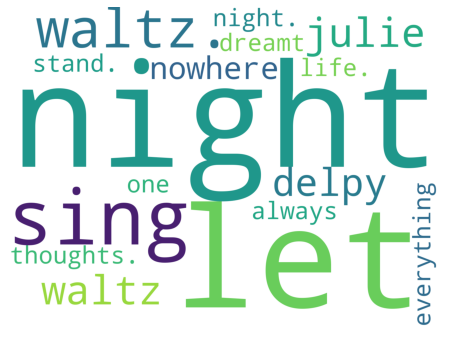

In [49]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# word_dict 를 이용해 wordcloud 만들기
wordcloud = WordCloud(background_color='white',
                     width=1600,
                     height=1200
                     ).generate_from_frequencies(word_dict)

plt.figure(figsize=(8,6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()